In [3]:
import tensorflow as tf
import numpy as np
import panadas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [4]:
(xt,yt), (xtt,ytt) = datasets.cifar10.load_data()

In [5]:
xt.shape

(50000, 32, 32, 3)

In [6]:
xtt.shape

(10000, 32, 32, 3)

In [7]:
yt[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

_It is  2D array so we will convert it to 1D_

In [8]:
yt.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
yt=yt.reshape(-1,)

In [10]:
yt

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
ytt=ytt.reshape(-1,)

In [12]:
xt[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

# MENTIONING THE CLASSES IN THE DATASET

In [13]:
classes=['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
def plot_samp(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

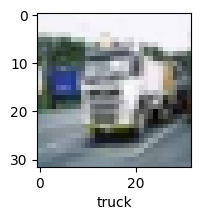

In [15]:
plot_samp(xt,yt,1000)

_IT BASICALLY PLOTS AND SHOES A IMAGE IN THE DATASET AT A ACERTAIN INDEX FOR REFERENCE_

# 

NORMALIZING AND TWEAKING THE DATA TO GET BETTER ACTIVATION VALUES

In [16]:
xt=xt/255.0
xtt=xtt/255.0

_divided by 255 because of RGB_

In [16]:
ann=models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(512,activation= 'relu'), #first layer
    layers.Dense(256,activation='relu'), #next layer
    layers.Dense(10,activation='softmax') #final layer
])

ann.compile(optimizer='SGD', #strochastic gradient descent for backpropagation
            loss='sparse_categorical_crossentropy', #to get the loss thusused to minimize the loss
            metrics=['accuracy']) #to find the percent accuracy
with tf.device('/CPU:0'):
    ann.fit(xt, yt, epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 12s 14ms/step - loss: 1.9015 - accuracy: 0.3208
Epoch 2/5
782/782 [==============================] - 16s 20ms/step - loss: 1.7294 - accuracy: 0.3917
Epoch 3/5
782/782 [==============================] - 24s 30ms/step - loss: 1.6490 - accuracy: 0.4198
Epoch 4/5
782/782 [==============================] - 30s 38ms/step - loss: 1.5970 - accuracy: 0.4384
Epoch 5/5
782/782 [==============================] - 30s 38ms/step - loss: 1.5558 - accuracy: 0.4532


In [17]:
from sklearn.metrics import confusion_matrix, classification_report
ypred=ann.predict(xtt)
ypred_class=[np.argmax(element) for element in ypred]
print('classification report : \n',classification_report(ytt,ypred_class))

313/313 [==============================] - 2s 5ms/step
classification report : 
               precision    recall  f1-score   support

           0       0.49      0.56      0.53      1000
           1       0.71      0.31      0.43      1000
           2       0.41      0.21      0.28      1000
           3       0.29      0.37      0.33      1000
           4       0.51      0.21      0.30      1000
           5       0.33      0.40      0.36      1000
           6       0.54      0.42      0.48      1000
           7       0.37      0.63      0.47      1000
           8       0.70      0.36      0.48      1000
           9       0.37      0.74      0.49      1000

    accuracy                           0.42     10000
   macro avg       0.47      0.42      0.41     10000
weighted avg       0.47      0.42      0.41     10000



In [17]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])


In [20]:
# Path to external image
img_path = "images.jpeg" 
# Load the image and resize to 32x32
img = image.load_img(img_path, target_size=(32, 32))
# Convert to array
img_array = image.img_to_array(img)
# Normalize same as training data
img_array = img_array / 255.0
# Add batch dimension (1, 32, 32, 3)
img_array = np.expand_dims(img_array, axis=0)

In [ ]:
pred = cnn.predict(img_array)
pred_class = np.argmax(pred, axis=1)[0]
print("Predicted class:", pred_class)

In [21]:
print("Shape:", img_array.shape)
print("dtype:", img_array.dtype)


Shape: (1, 32, 32, 3)
dtype: float32


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class labels
cifar10_classes = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Path to your external image
img_path = "E:\Jupyter Notebook\Image Classification\images.jpg"  # <-- replace with your file

# Load and preprocess
img = image.load_img(img_path, target_size=(32, 32))    # resize
img_array = image.img_to_array(img)                     # (32, 32, 3)
img_array = img_array.astype("float32") / 255.0         # normalize
img_array = np.expand_dims(img_array, axis=0)           # (1, 32, 32, 3)

# Predict
pred = cnn.predict(img_array)
pred_class = np.argmax(pred, axis=1)[0]
pred_label = cifar10_classes[pred_class]

# Show
plt.imshow(img)
plt.title(f"Predicted: {pred_label} ({pred_class})")
plt.axis("off")
plt.show()
